In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [6]:
# write your code here
import sqlite3


con = sqlite3.connect("../db.sqlite3")
cur = con.cursor()

resta_query = """
    SELECT *
    FROM restaurant_orderitem
    INNER JOIN restaurant_order
        ON restaurant_orderitem.order_id = restaurant_order.id
    INNER JOIN restaurant_product
        ON restaurant_orderitem.product_id = restaurant_product.id
"""

restaurant = pd.read_sql_query(resta_query, con)
restaurant.drop(["order_id", "product_id", "id"], inplace=True, axis=1)

restaurant.to_csv("restaurant.csv", index=False)

con.close()

In [46]:
df = pd.read_csv("restaurant.csv")

df.rename(columns={"name": "product_name"}, inplace=True)
df["datetime"] = pd.to_datetime(df["datetime"])

df.head()

,quantity,datetime,price,product_name
0,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

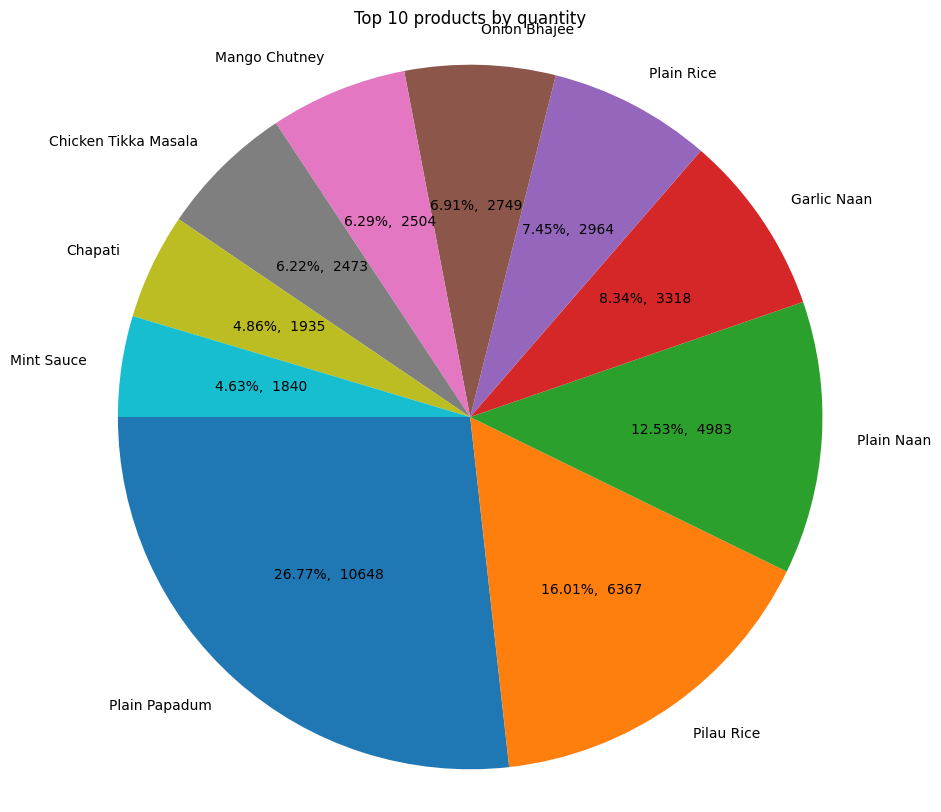

In [32]:
# write your code here
product_quant_sum = df.groupby(["product_name"])["quantity"].sum()
top_10_products = product_quant_sum.sort_values(ascending=False)[:10]

# Display top 10 products by sum of quantity
fig, ax = plt.subplots(figsize=(10, 10))

wedges, _, pct_texts = plt.pie(
    top_10_products,
    labels=top_10_products.index,
    autopct=lambda p: f"{p:.2f}%, {p*sum(top_10_products)/100: .0f}",
    startangle=180,
)

# for i, pct in enumerate(pct_texts):
#     angle = (wedges[i].theta1 + wedges[i].theta2) / 2
#     pct.set_rotation(angle)

plt.title("Top 10 products by quantity")
plt.axis('equal')
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

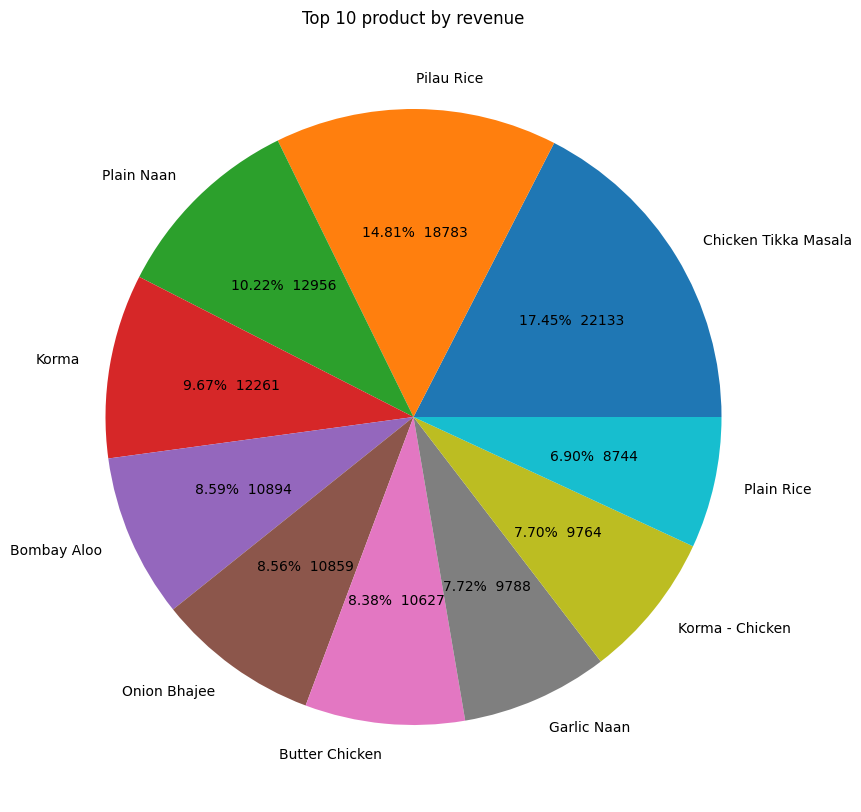

In [40]:
# write your code here
df = df.assign(**{
    "Item Price": df["price"] * df["quantity"]
})
product_revenue = df.groupby(["product_name"])["Item Price"].sum()
top_10_products = product_revenue.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 10))
plt.pie(
    top_10_products,
    labels=top_10_products.index,
    autopct=lambda p: f"{p :.2f}% {p*sum(top_10_products)/100: .0f}"  
)
plt.title("Top 10 product by revenue")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

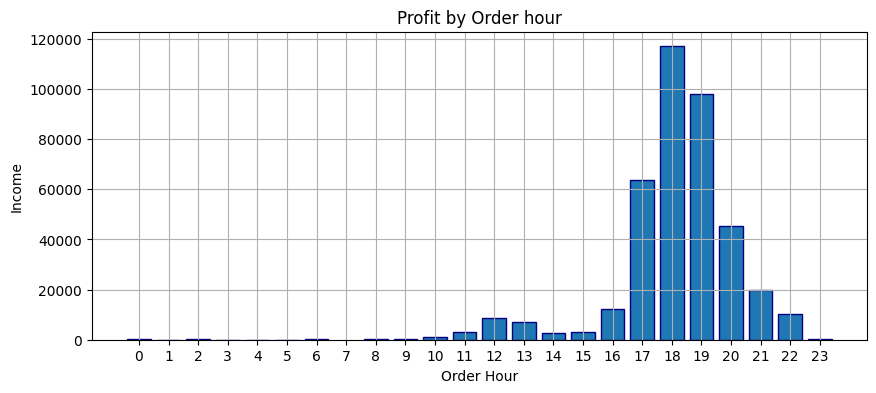

In [78]:
# write your code here
df = df.assign(**{
    "Order Hour": df["datetime"].dt.hour
})

# get number of orders in the specific hour
num_of_orders = df.groupby(["Order Hour"])["price"].sum()
plt.figure(figsize=(10, 4))
plt.bar(num_of_orders.index, num_of_orders, edgecolor="navy")
plt.title("Profit by Order hour")
plt.xlabel("Order Hour")
plt.ylabel("Income")
plt.grid(True)
plt.xticks(range(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

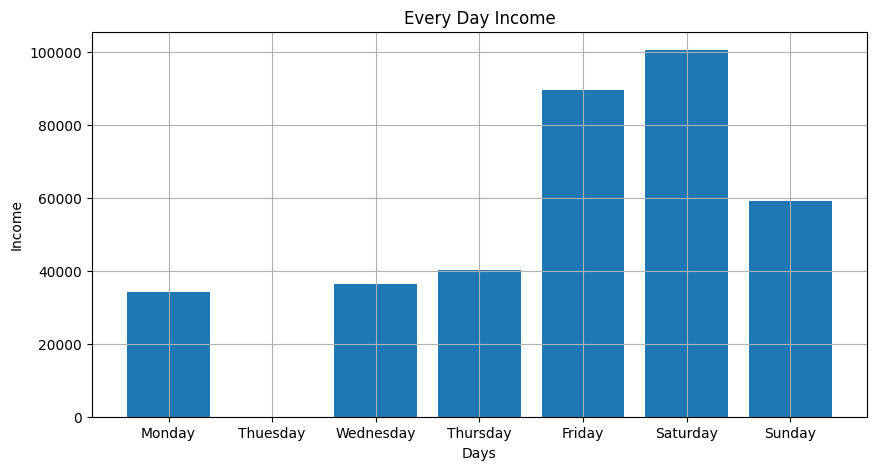

In [90]:
# write your code here
df = df.assign(**{
    "Order Day": df["datetime"].dt.day_name()
})
order_days_income = df.groupby(["Order Day"])["price"].sum()
order_days_income = order_days_income.reindex([
    "Monday",
    "Thuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday"
])

plt.figure(figsize=(10, 5))
plt.bar(order_days_income.index, order_days_income)
plt.title("Every Day Income")
plt.xlabel("Days")
plt.ylabel("Income")
plt.grid(True)
plt.show()